# READ ME
kaggleのタイタニックでEDA

- **わかったこと**
 - 欠損データの対処
   - 欠損のあるデータを削除する
   - 何かの値(中央値、平均値、一番多いもの など)に置き換える：今回は中央値
- **わからなかったこと**
 - 各値と生存の関係を確認したかったが単純な散布図ではうまくいかなかった

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
from sklearn.preprocessing import LabelEncoder,PowerTransformer

## データの読み込み 

In [8]:
df_train=pd.read_csv("./titanic/train.csv")
df_test=pd.read_csv("../input/titanic/test.csv")
df_gender=pd.read_csv("../input/titanic/gender_submission.csv")

### trainデータの概要

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 乗客891名分のデータ
- 説明変数は12
 - PassengerId ：乗客ID
 - Survived ：生死  
  0=死亡、1=生存
 - Pclass ：チケットクラス  
  1 = 上層クラス（お金持ち）2 = 中級クラス（一般階級）3 = 下層クラス（労働階級）
 - Name
 - Sex
 - Age(欠損データ 177件)
 - SibSp ：タイタニック号に同乗している兄弟/配偶者の数     
 - Parch ：タイタニック号に同乗している親/子供の数
 - Ticket ：チケット番号
 - Fare 
 - Cabin ：部屋番号 (欠損データ 687件)
 - Embarked ：出港地 (欠損データ 2件)  
  C = Cherbourg、Q = Queenstown、S = Southampton
 
 Age,Cabin,Embarkedに欠損あり

In [14]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 調べたい値
救命ボートに女性と子供を優先的に乗せようとするイメージがある
- Age 
- Sex

上級キャビンの方が安全な場所に設けられている気がする
- Pclass

In [20]:
# 使いたい値Ageに欠損があるので、中央値で置き換えてみる
# kaggleの1位の人がやってた
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# 性別のmale,femaleを数値にする
df_train['Sex'] = df_train['Sex'].map({
    'male': 0,
    'female': 1,
})

## それぞれのデータを見る 

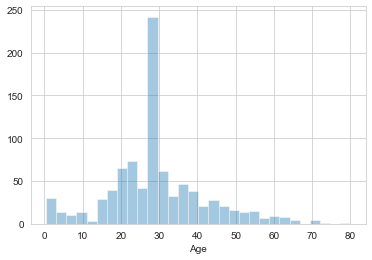

In [23]:
sns.distplot(df_train['Age'], kde=False)

- 20～30代が多い
- 30歳手前の若者がすごく多い？？

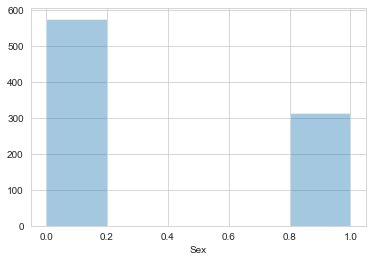

In [31]:
sns.distplot(df_train['Sex'], kde=False)

(ちょっとわかりにくい)
- 男性(0)が女性(1)の倍近く乗船している

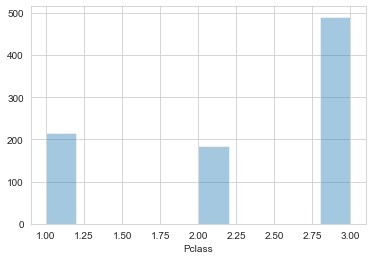

In [29]:
sns.distplot(df_train['Pclass'], kde=False)

- 労働階級(3)＞上流階級(1)＞一般階級(2)